<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/Ejercicio_del_curso_de_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hacer un clasificador que prediga si una cancion va a gustar o no. 1 si gusta 0 si no gusta.

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
y = attributes_spotify.target
attributes_spotify.drop(['target'], axis=1, inplace=True)
attributes_spotify.drop(['song_title'], axis=1, inplace=True)
attributes_spotify.drop(['artist'], axis=1, inplace=True)
#attributes_spotify.drop([''])
X=attributes_spotify




# Desicion Trees

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       266

    accuracy                           1.00       505
   macro avg       1.00      1.00      1.00       505
weighted avg       1.00      1.00      1.00       505

[[239   0]
 [  0 266]]


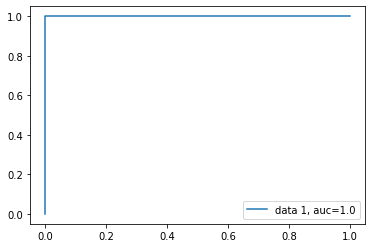

Text(0.5, 257.44, 'Predicted label')

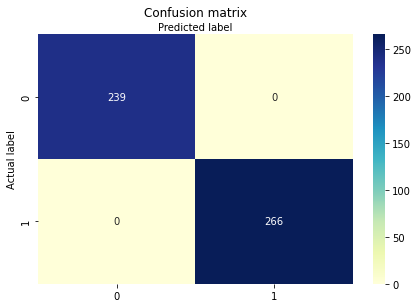

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
#Training the model
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
score=DT.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Logistic Regrssion

0.9346534653465347
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       239
           1       0.95      0.93      0.94       266

    accuracy                           0.93       505
   macro avg       0.93      0.93      0.93       505
weighted avg       0.93      0.93      0.93       505

[[225  14]
 [ 19 247]]


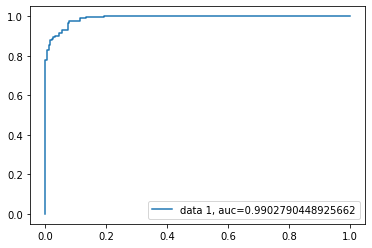

Text(0.5, 257.44, 'Predicted label')

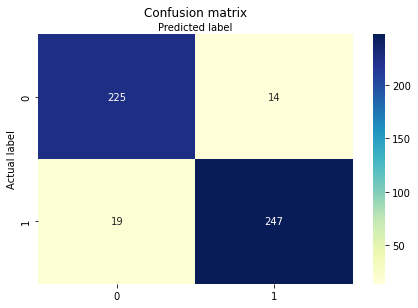

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
score=logreg.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Support vector classifiers

0.9663366336633663
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       239
           1       0.98      0.95      0.97       266

    accuracy                           0.97       505
   macro avg       0.97      0.97      0.97       505
weighted avg       0.97      0.97      0.97       505

[[235   4]
 [ 13 253]]


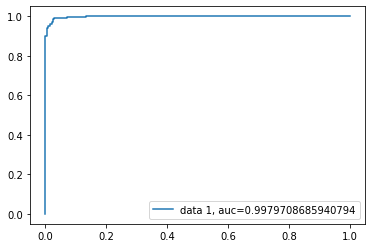

Text(0.5, 257.44, 'Predicted label')

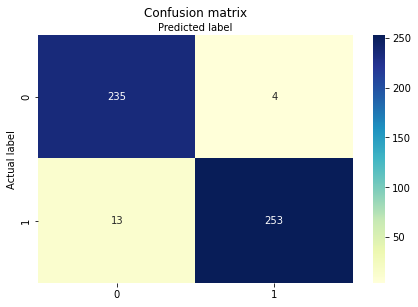

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel ='rbf'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = clf.decision_function(X_test)[::]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Naive Bayes classifier

0.9821782178217822
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       239
           1       0.99      0.97      0.98       266

    accuracy                           0.98       505
   macro avg       0.98      0.98      0.98       505
weighted avg       0.98      0.98      0.98       505

[[237   2]
 [  7 259]]


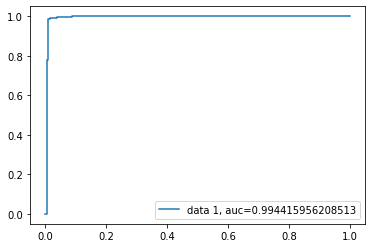

Text(0.5, 257.44, 'Predicted label')

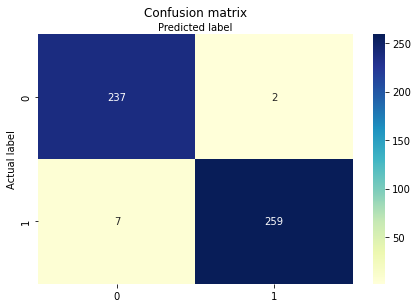

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Gradient boosting classifier

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       266

    accuracy                           1.00       505
   macro avg       1.00      1.00      1.00       505
weighted avg       1.00      1.00      1.00       505

[[239   0]
 [  0 266]]


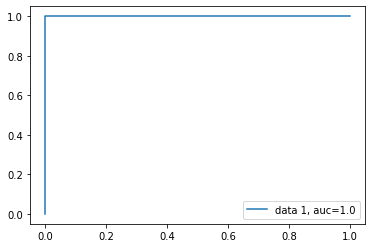

Text(0.5, 257.44, 'Predicted label')

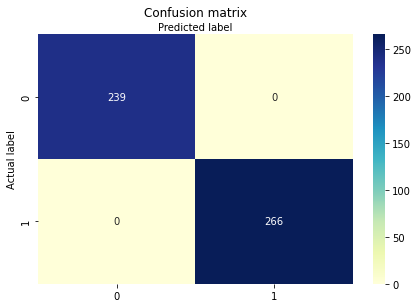

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=16)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score=clf.score(X_test, y_test)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix( y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix( y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')